In [1]:
### Creating a dataset
import torch

# Parameters
m = 0.7
c = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = m*X+c



### Splitting the dataset
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]


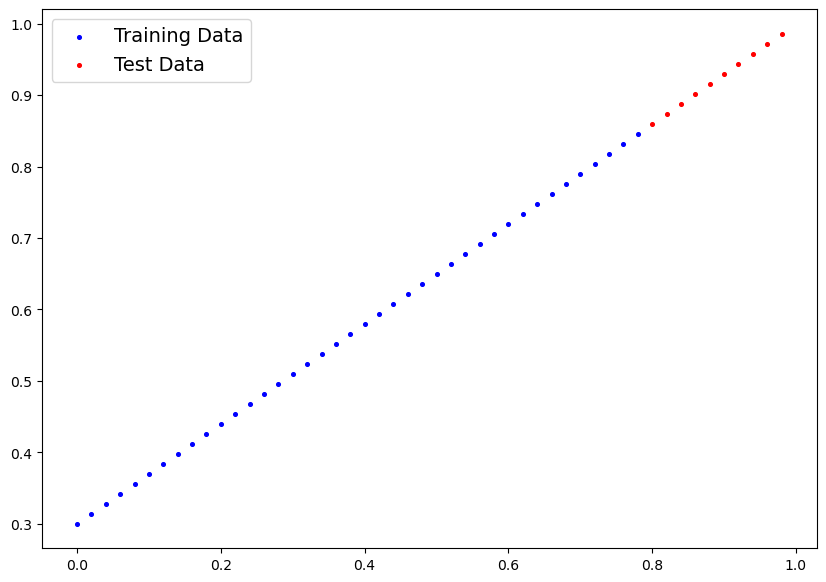

In [2]:
## Visualizing the data
import matplotlib.pyplot as plt


def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels,c="b",s=7,label="Training Data")
    plt.scatter(test_data,test_labels,c="r",s=7,label="Test Data")
    if predictions:
        plt.scatter(test_data,predictions,c="g",s=7,label="Predictions")
        
    plt.legend(prop={"size":14})     
    plt.show()
    

plot_predictions()

In [118]:
### Creating a Linear Regression Model
import torch.nn as nn



class LinearRegressionClassifier(nn.Module):
    
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.tensor(1,requires_grad=True,dtype=torch.float))
        
    
    def forward(self,x):
        
        return self.weights*x+self.bias



In [143]:
### Making Random predictions

torch.manual_seed(47)

model = LinearRegressionClassifier()

# list(model.parameters())
#model.state_dict()


with torch.inference_mode():  ### Can also be implemented using torch.no_grad()
    y_preds = model(X_test)
    

#plot_predictions(predictions=y_preds)


In [144]:
### Training
from torch import optim
from torch.utils.data import DataLoader


criterion = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.048)
epochs = 300
train_loss_list = []
test_loss_list = []
epoch_count = []

for epoch in range(epochs):
    
    
    ##Training
    model.train()
    y_preds = model(X_train)
    loss = criterion(y_preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    
    ## Testing
    
    model.eval()
    with torch.inference_mode():
        test_prep = model(X_test)
        
        test_loss = criterion(test_prep,y_test)
    
    
    
    if(epoch%10==0):
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        epoch_count.append(epoch+1)
        print(f"Epoch: {epoch} -> Training_Loss: {loss} , Testing Loss {test_loss}")
    
        
        
    

model.state_dict()





Epoch: 0 -> Training_Loss: 0.4442574381828308 , Testing Loss 1.206512689590454
Epoch: 10 -> Training_Loss: 0.4106824994087219 , Testing Loss 1.05739426612854
Epoch: 20 -> Training_Loss: 0.3894972801208496 , Testing Loss 0.9623187780380249
Epoch: 30 -> Training_Loss: 0.37165147066116333 , Testing Loss 0.8964051008224487
Epoch: 40 -> Training_Loss: 0.3548993468284607 , Testing Loss 0.8435090780258179
Epoch: 50 -> Training_Loss: 0.33814728260040283 , Testing Loss 0.790613055229187
Epoch: 60 -> Training_Loss: 0.32157957553863525 , Testing Loss 0.7476083636283875
Epoch: 70 -> Training_Loss: 0.30508074164390564 , Testing Loss 0.7111978530883789
Epoch: 80 -> Training_Loss: 0.28862422704696655 , Testing Loss 0.6714903116226196
Epoch: 90 -> Training_Loss: 0.272122323513031 , Testing Loss 0.6317828297615051
Epoch: 100 -> Training_Loss: 0.2556314766407013 , Testing Loss 0.5953723788261414
Epoch: 110 -> Training_Loss: 0.23917126655578613 , Testing Loss 0.5556648373603821
Epoch: 120 -> Training_Los

OrderedDict([('weights', tensor([0.6527])), ('bias', tensor(0.2776))])

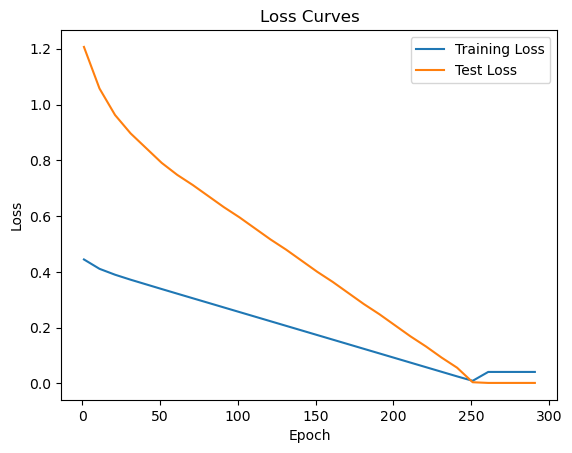

In [ ]:
## Plotting Loss curves

import numpy as np

#plt.figure(figsize=(10.7))
plt.plot(epoch_count,np.array(torch.tensor(train_loss_list).numpy()),label="Training Loss")
plt.plot(epoch_count,test_loss_list,label="Test Loss")
plt.title("Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()


In [148]:
### Saving a model

path = "/home/azwad/Works/Deep_Learning/New_Revisions/Pytorch_Workflow/LinearRegression.pth"
torch.save(model.state_dict(),path)

In [149]:
### Loading a model

model_new = LinearRegressionClassifier()

model_new.load_state_dict(torch.load(path))
model_new.state_dict()

/tmp/ipykernel_11029/1242837823.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load(path))


OrderedDict([('weights', tensor([0.6527])), ('bias', tensor(0.2776))])